EE21S061 Arihant Jain Lab 3 for EE5175 course:

In [ ]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy
!pip install opencv-python

Importing and installing necessary libraries to setup the notebook.

Here i am using opencv to computer SIFT points needed for ransac and mosaic operation

In [2]:
from matplotlib import pyplot as plt
import random
%matplotlib inline


plt.rcParams['figure.figsize'] = [18, 7] 

Loading the images given in the question

In [205]:
from PIL import Image
from numpy import asarray
import cv2
import math
import numpy as np
from sympy import *
# load the image


img_1=cv2.imread('img1.png',0) 
img_2=cv2.imread('img2.png',0) 
img_3=cv2.imread('img3.png',0) 



In [206]:
img_1.shape #checking the dimension of the image

(360, 640)

Below are the 3 function i will be using throughout this notebook.

* bilin : Computes bilinear interpolation on x and y given an image.

* homography : Computes null space for A which is made of passed point correspondence, minimum points needed are 4 to compute a homography

* ransac : uses the homography function defined above to compute homography for 4 points in all point correspondence and verifies it against all other points and tries to figure out optimum homography. Its basically trying to get rid of the outliers which are very likely to be there.



In [207]:
from sympy import *
def bilin(xs,ys,data):
        #This function takes fraction co-ordinate for source image based on target to source matrix and then uses bilinear interpolation to calculated the value of the given target co-ordinate
        xs_f=math.floor(xs)
        ys_f=math.floor(ys)
        a=ys-ys_f
        b=xs-xs_f
        #Above we calculate all necessary values to perform bilinear interpolation
        if (xs<0 or ys<0 or xs>data.shape[0]-2 or ys>data.shape[1]-2):
            #to account for the fact that this function may sometimes receive invalid co-ordinate such as negative or beyond image dimensions
            return 0
        return (((1-a)*(1-b)*data[xs_f][ys_f])+
                ((a)*(1-b)*data[xs_f+1][ys_f])+
                ((1-a)*(b)*data[xs_f][ys_f+1])+
                ((a)*(b)*data[xs_f+1][ys_f+1]))
    

def homography(p1):
    a=np.empty((0,9))
    for i in range(len(p1)):
        x=p1[i][0]
        y=p1[i][1]
        a = np.append(a, np.array([[y[0],y[1],1,0,0,0,-1*(x[0]*y[0]),-1*(x[0]*y[1]),-x[0]]]), axis=0)
        a = np.append(a, np.array([[0,0,0,y[0],y[1],1,-1*(x[1]*y[0]),-1*(x[1]*y[1]),-x[1]]]), axis=0)
    #Creating numpy array to store A after this we will use sympy to solve for null space of this matrix
    A=Matrix(a)
    temp=A.nullspace()
    h= np.reshape(temp[0],(3,3))
    return Matrix(h)


def ransac(point_cor,dist,support_check,num_iter=20,debug=False):#[from][to]
    # dist -> epsilon 
    # support -> required consensus 
    # num_iter -> number of iteration before stopping 
    # debug -> prints iteration number and consensus of each iteration if True
    flag=True
    it=0
    # setting up flag and counter variable to verify when exit condition are reached
    if support_check>1:
        print("enter support<1")
        return False
    # support can not be greater than 1 
    support=0
    while(flag):
        # defining a consensus set to which we will be adding each index which falls in our epsilon range
        consensus=set()
        a=np.empty((0,9))
        H=homography(random.sample(point_cor,4)) # sampling randomly 4 points from given point correspondence
        H=np.float_(H)
        # computed homography is now tested against all the points in consensus
        for i in point_cor:
            temp_x=np.matmul(H,np.array([i[1][0],i[1][1],1]))
            if temp_x[2]>1:
                temp_x[0]=temp_x[0]/temp_x[2]
                temp_x[1]=temp_x[1]/temp_x[2]
            d=np.sqrt(((i[0][0]-temp_x[0])**2)+((i[0][1]-temp_x[1])**2))
            # distance calculated based on computer homography and known point correspondence
            if (d<dist):
                consensus.add(point_cor.index(i))
                # if a point agrees to H then its added to consensus 
        if ((len(consensus)/len(point_cor))>support):
            # len of consensus is computed every iteration to look for exit condition
            support=len(consensus)/len(point_cor)
            H_return=H
            if (support>support_check):
                return H_return,support
        it+=1
        if debug==True:
            print("Iteration :",it,"Consensus :",support)
        # if debug is true then iteration and consensus set is printed
        if it>num_iter:
            flag=False
            return H_return,support
        # if given consensus is not acheived in the given number of iteration the best solution found during these iteration is returned


I can write how these equation form and how we arrive at the above solution but it is already covered in the question for Lab 3 under 2.2 and 2.3

In [208]:
data = asarray(img_1)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


In [209]:
data = asarray(img_2)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


In [210]:
data = asarray(img_3)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


Text(0.5, 1.0, 'IMG3')

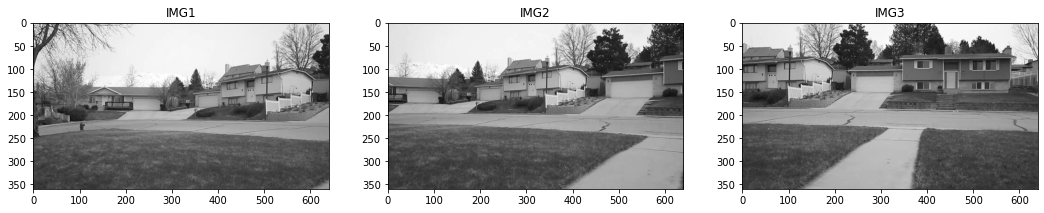

In [9]:
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img_3,cmap="gray")
axis[2].set_title('IMG3')

Looking up stats and image to get a sense of what we are working with.

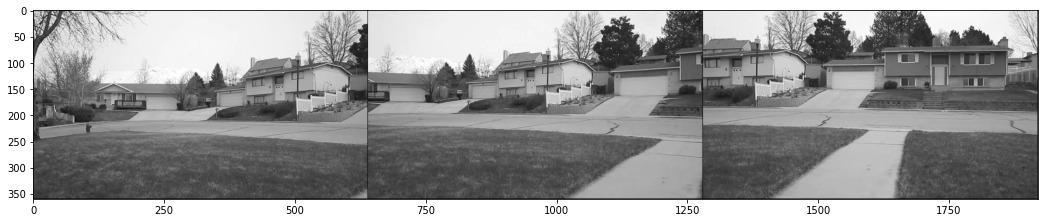

In [10]:

data4=np.zeros((360, 1920))
data1 = asarray(img_1)
data2 = asarray(img_2)
data3 = asarray(img_3)
for x in range(data1.shape[0]-1):
    for y in range(data1.shape[1]-1):
        data4[x][y]=data1[x][y]
for x in range(data2.shape[0]-1):
    for y in range(data2.shape[1]-1):
        data4[x][y+640]=data2[x][y]
for x in range(data3.shape[0]-1):
    for y in range(data3.shape[1]-1):
        data4[x][y+1280]=data3[x][y]
plt.imshow(data4,cmap="gray")

Here i just attached one image to end of another to see how it would look

Code below was copied from various sources on the web and it basically uses opencv library to computer keypoints and descriptors.

Keypoints are actually the pixel co-ordinates which it finds intersting in a image and descriptors is what it finds intersting there.

After we get this we can use BFMatcher another function in opencv to match these descriptors to look for similarities and which points are intersting in both of the image.

We can then use these points as our point correspondence to run ransac to compute our Homography

Text(0.5, 1.0, 'IMG3')

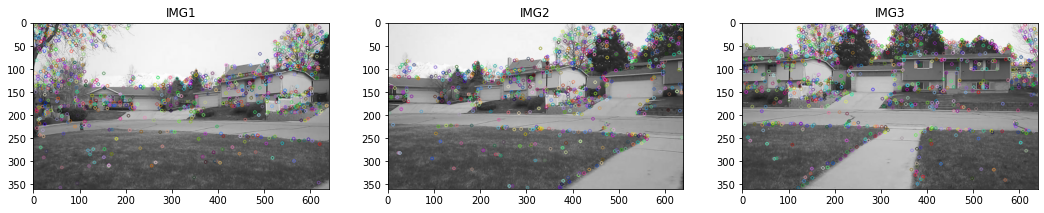

In [218]:


#keypoints and descriptor

sift_1 = cv2.SIFT_create()
kp_1,des_1 = sift_1.detectAndCompute(img_1,None)



#keypoints and descriptor
sift_2 = cv2.SIFT_create()
kp_2,des_2 = sift_2.detectAndCompute(img_2,None)




#keypoints and descriptor
sift_3 = cv2.SIFT_create()
kp_3,des_3 = sift_3.detectAndCompute(img_3,None)


img1=np.zeros((360,640))
img1 = cv2.drawKeypoints(img_1,kp_1,img1)

img2=np.zeros((360,640))
img2 = cv2.drawKeypoints(img_2,kp_2,img2)

img3=np.zeros((360,640))
img3 = cv2.drawKeypoints(img_3,kp_3,img3)

figure, axis = plt.subplots(1, 3)
axis[0].imshow(img1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img3,cmap="gray")
axis[2].set_title('IMG3')

Drawing the keypoint sift found in each image over them lets us see all the points whether or not common across the images.

This gives us a good sense of what we are working with.

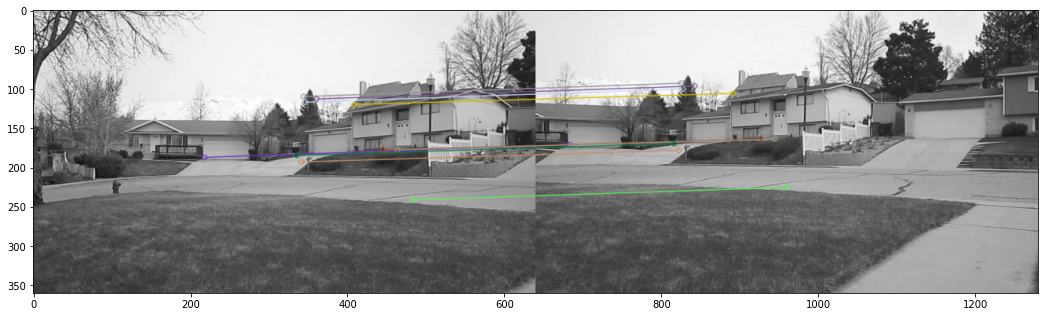

In [219]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)
# match descriptors of both images
matches = bf.match(des_1,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 10 matches
matched_img = cv2.drawMatches(img_1, kp_1, img_2, kp_2, matches[:10], img_2, flags=2)
plt.imshow(matched_img)

This above piece of code is also picked up from web to draw keypoints it matched between 2 image which here are image_1 and image_2 in left and right respectively

In [223]:
list_kp21 = [(kp_1[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:40]] 
H21=homography(random.sample(list_kp21,4))

I tried the homography function with a random sample of 4 to see how were the result i got

In [224]:
H21

Matrix([
[    0.731211803122758,  -0.0176096327313964, 182.599536268618],
[  -0.0839614418417321,    0.880076080567993, 34.8996821045829],
[-0.000402720723336855, -6.67193021303955e-5,                1]])

Not all the matches i got through this method where great and in the above code we also sorted the matches according to the distance. So i tried to get a good conensus it gave worse result with more number of point so i took the closest 40 matches given by opencv library and run then through my ransac algorithm

In [225]:
H21,support=ransac(list_kp21,5,0.8,1000,debug=True)

Iteration : 1 Consensus : 0
Iteration : 2 Consensus : 0
Iteration : 3 Consensus : 0.05
Iteration : 4 Consensus : 0.05
Iteration : 5 Consensus : 0.05
Iteration : 6 Consensus : 0.05
Iteration : 7 Consensus : 0.05
Iteration : 8 Consensus : 0.05
Iteration : 9 Consensus : 0.375
Iteration : 10 Consensus : 0.375
Iteration : 11 Consensus : 0.375
Iteration : 12 Consensus : 0.4
Iteration : 13 Consensus : 0.4
Iteration : 14 Consensus : 0.4
Iteration : 15 Consensus : 0.4
Iteration : 16 Consensus : 0.4
Iteration : 17 Consensus : 0.4
Iteration : 18 Consensus : 0.4
Iteration : 19 Consensus : 0.4
Iteration : 20 Consensus : 0.675
Iteration : 21 Consensus : 0.675
Iteration : 22 Consensus : 0.675
Iteration : 23 Consensus : 0.675
Iteration : 24 Consensus : 0.675
Iteration : 25 Consensus : 0.675
Iteration : 26 Consensus : 0.675
Iteration : 27 Consensus : 0.675
Iteration : 28 Consensus : 0.675
Iteration : 29 Consensus : 0.675
Iteration : 30 Consensus : 0.675
Iteration : 31 Consensus : 0.675
Iteration : 32 C

Iteration : 249 Consensus : 0.675
Iteration : 250 Consensus : 0.675
Iteration : 251 Consensus : 0.675
Iteration : 252 Consensus : 0.675
Iteration : 253 Consensus : 0.75
Iteration : 254 Consensus : 0.75
Iteration : 255 Consensus : 0.75
Iteration : 256 Consensus : 0.75
Iteration : 257 Consensus : 0.75
Iteration : 258 Consensus : 0.75
Iteration : 259 Consensus : 0.75
Iteration : 260 Consensus : 0.75
Iteration : 261 Consensus : 0.75
Iteration : 262 Consensus : 0.75
Iteration : 263 Consensus : 0.75
Iteration : 264 Consensus : 0.75
Iteration : 265 Consensus : 0.75
Iteration : 266 Consensus : 0.75
Iteration : 267 Consensus : 0.75
Iteration : 268 Consensus : 0.75
Iteration : 269 Consensus : 0.75
Iteration : 270 Consensus : 0.75
Iteration : 271 Consensus : 0.75
Iteration : 272 Consensus : 0.75
Iteration : 273 Consensus : 0.75
Iteration : 274 Consensus : 0.75
Iteration : 275 Consensus : 0.75
Iteration : 276 Consensus : 0.75
Iteration : 277 Consensus : 0.75
Iteration : 278 Consensus : 0.75
Iterat

Iteration : 502 Consensus : 0.75
Iteration : 503 Consensus : 0.75
Iteration : 504 Consensus : 0.75
Iteration : 505 Consensus : 0.75
Iteration : 506 Consensus : 0.75
Iteration : 507 Consensus : 0.75
Iteration : 508 Consensus : 0.75
Iteration : 509 Consensus : 0.75
Iteration : 510 Consensus : 0.75
Iteration : 511 Consensus : 0.75
Iteration : 512 Consensus : 0.75
Iteration : 513 Consensus : 0.75
Iteration : 514 Consensus : 0.75
Iteration : 515 Consensus : 0.75
Iteration : 516 Consensus : 0.75
Iteration : 517 Consensus : 0.75
Iteration : 518 Consensus : 0.75
Iteration : 519 Consensus : 0.75
Iteration : 520 Consensus : 0.75
Iteration : 521 Consensus : 0.75
Iteration : 522 Consensus : 0.75
Iteration : 523 Consensus : 0.75
Iteration : 524 Consensus : 0.75
Iteration : 525 Consensus : 0.75
Iteration : 526 Consensus : 0.75
Iteration : 527 Consensus : 0.75
Iteration : 528 Consensus : 0.75
Iteration : 529 Consensus : 0.75
Iteration : 530 Consensus : 0.75
Iteration : 531 Consensus : 0.75
Iteration 

Iteration : 762 Consensus : 0.75
Iteration : 763 Consensus : 0.75
Iteration : 764 Consensus : 0.75
Iteration : 765 Consensus : 0.75
Iteration : 766 Consensus : 0.75
Iteration : 767 Consensus : 0.75
Iteration : 768 Consensus : 0.75
Iteration : 769 Consensus : 0.75
Iteration : 770 Consensus : 0.75
Iteration : 771 Consensus : 0.75
Iteration : 772 Consensus : 0.75
Iteration : 773 Consensus : 0.75
Iteration : 774 Consensus : 0.75
Iteration : 775 Consensus : 0.75
Iteration : 776 Consensus : 0.75
Iteration : 777 Consensus : 0.75
Iteration : 778 Consensus : 0.75
Iteration : 779 Consensus : 0.75
Iteration : 780 Consensus : 0.75
Iteration : 781 Consensus : 0.75
Iteration : 782 Consensus : 0.75
Iteration : 783 Consensus : 0.75
Iteration : 784 Consensus : 0.75
Iteration : 785 Consensus : 0.75
Iteration : 786 Consensus : 0.75
Iteration : 787 Consensus : 0.75
Iteration : 788 Consensus : 0.75
Iteration : 789 Consensus : 0.75
Iteration : 790 Consensus : 0.75
Iteration : 791 Consensus : 0.75
Iteration 

In [226]:
H21

array([[ 9.94331835e-01,  4.81734713e-02,  1.57653198e+02],
       [-2.43695445e-02,  1.01875423e+00,  1.93764297e+01],
       [ 3.07553089e-05,  1.68174797e-05,  1.00000000e+00]])

In [227]:
support

0.75

I tried multiple attempt at the above code with different $ \epsilon $ ,number of points correspondence and number of iteration.I got a conensus of 75% at $\epsilon = 5$ for img_1 and img_2 this seems to be good enough estimate for me  

Ran img_2 and img_3 through a same process to get homography matrix H23

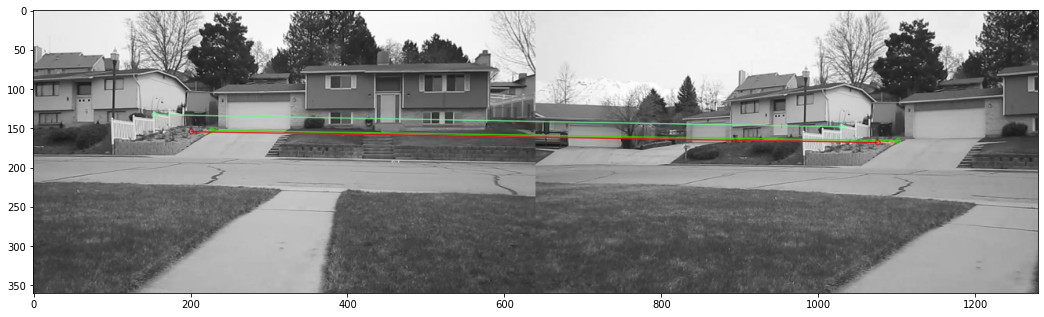

In [228]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(des_3,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img_3, kp_3, img_2, kp_2, matches[:4], img_2, flags=2)
plt.imshow(matched_img)

In [229]:
list_kp23 = [(kp_3[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:50]] 
H23=homography(random.sample(list_kp23,4))

In [230]:
H23

Matrix([
[    1.58889533638734,   0.0178015579654318, -411.474992191334],
[   0.163997212438604,     1.44182036369329, -95.8860046995132],
[0.000872442281923477, 0.000176072757495581,                 1]])

In [231]:
H23,support=ransac(list_kp23,5,0.8,1000,debug=True)

In [232]:
H23

array([[ 1.55657503e+00, -3.98981788e-02, -3.97477168e+02],
       [ 1.64828727e-01,  1.36096926e+00, -9.05109341e+01],
       [ 8.72957671e-04, -1.20406779e-04,  1.00000000e+00]])

In [233]:
support

0.96

This is a really good result i was able to get 96% consensus at $\epsilon = 5$.

In [23]:
from PIL import Image
from numpy import asarray

# load the image
img_1 = asarray(Image.open('img1.png'))
img_2 = asarray(Image.open('img2.png'))
img_3 = asarray(Image.open('img3.png'))


Now that we have both homography matrix verified by our ransac algorithm i started working towards mosaicing them.

Here i have revisited the visual of the image before seeing how they would look together after stiching

Text(0.5, 1.0, 'IMG3')

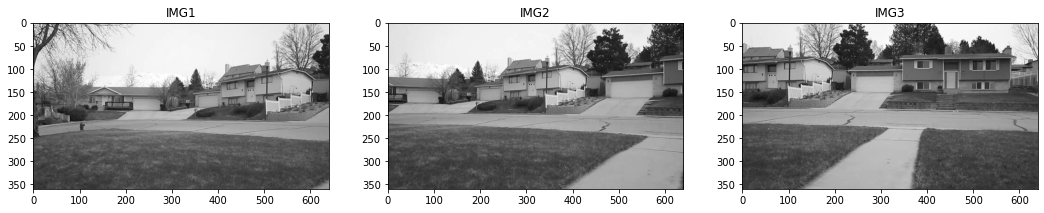

In [24]:
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img_3,cmap="gray")
axis[2].set_title('IMG3')

In the below piece of code i am creating a black canvas of size 1080*1920 to hold our full image.
Offset basically moves the img_2 origin from canvas origin so we have space to put image 1 there. otherwise image1 would just be defined outside the canvas view.

In [235]:
canvas=np.zeros((1080,1920))
offset=[300,300]

#setting up canvas and offset both of which are arbitrary
for y_s in range(canvas.shape[0]-1):
    for x_s in range(canvas.shape[1]-1):
        v=[]
        x=x_s-offset[0]
        y=y_s-offset[1]
        #using offset to get define img_2 space co-ordinate system from canvas co-ordinate system
        tmp=np.matmul(H21,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]
        #Applying homography and using bilinear interpolation to get the pixel intensity
        v.append(bilin(tmp[1],tmp[0],img_1))
        
        tmp=np.matmul(H23,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]
        #Applying homography and using bilinear interpolation to get the pixel intensity
        v.append(bilin(tmp[1],tmp[0],img_3))
        #image_2 does not change or move as we are in image 2 reference plane
        v.append(bilin(y,x,img_2))

    # to account for fact that some times 2 or less point would be valid hence divide by 3 would decrease image intensity
        if v.count(0)>2:
            continue
        canvas[y_s][x_s]=sum(v)/(3-v.count(0))
        
                      

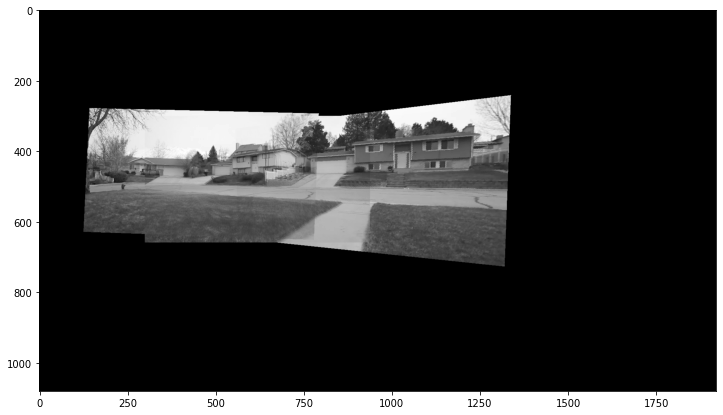

In [236]:
plt.imshow(canvas,cmap="gray")

The stitch above looks great but the canvas we choose is too big there is a lot of empty space lets take care of that.

In [237]:
canvas=np.zeros((550,1400))
offset=[300,100]
for x_s in range(canvas.shape[1]):
    for y_s in range(canvas.shape[0]):
        v=[]
        x=x_s-offset[0]
        y=y_s-offset[1]
        x21=np.matmul(H21,[x,y,1])
        x21[0]=x21[0]/x21[2]
        x21[1]=x21[1]/x21[2]
        v.append(bilin(x21[1],x21[0],img_1))
        v.append(bilin(y,x,img_2))
        x23=np.matmul(H23,[x,y,1])
        x23[0]=x23[0]/x23[2]
        x23[1]=x23[1]/x23[2]
        v.append(bilin(x23[1],x23[0],img_3))
        
        if v.count(0)>2:
            continue
        canvas[y_s][x_s]=sum(v)/(3-v.count(0))

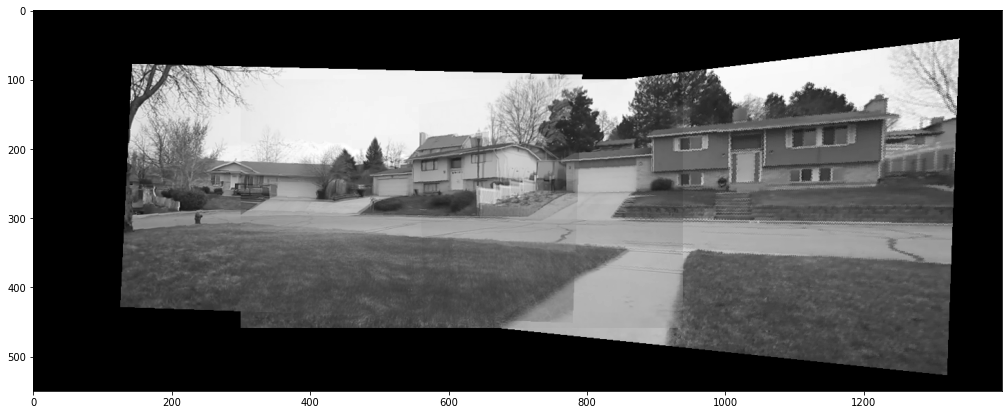

In [238]:
plt.imshow(canvas,cmap="gray")

# Observation

- Looking closer we can see a rough line along which these image are overlaid and this seems to be because beyond these lines one of the 3 images have more weightage and in these overlays averaging the pixel intensity creates these artifacts.

- the middle house seems blur and also we can see around (700,200) there it seems like we have a shadow of the middle house. This seems to be the effect of averaging and not perfect homography

# Testing the algorithm with my own images.

- I took 3 picture of a park and there is some overlap between them but i already know that these image are really close to the camera hence we might not get a good homography. We get to know more at the end of this notebook

In [161]:
img_1=cv2.imread('img1_capture.jpg',0) 
img_2=cv2.imread('img2_capture.jpg',0) 
img_3=cv2.imread('img3_capture.jpg',0) 

resolution=(640,480)
img_1 = cv2.resize(img_1, resolution)
img_2 = cv2.resize(img_2, resolution)
img_3 = cv2.resize(img_3, resolution)



Loading in my images and resizing them i tried using a higher resolution image but it had many issues getting a good enough homography best i could manage was 0.34 so i decided to reduce the resolution of the image to try to get better results

In [162]:
data = asarray(img_1)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(480, 640)
Number of Pixels 307200


In [163]:
data = asarray(img_2)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(480, 640)
Number of Pixels 307200


In [164]:
data = asarray(img_3)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(480, 640)
Number of Pixels 307200


Text(0.5, 1.0, 'IMG3')

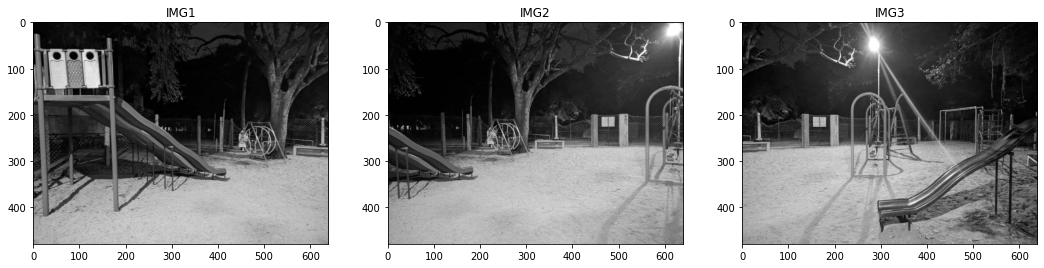

In [165]:
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img_3,cmap="gray")
axis[2].set_title('IMG3')

We can look at the 3 images side by side and look at how much overlap can be observe and visualize the image before moving onto processing it

This is the same code we used before but only the images have been replaced

Text(0.5, 1.0, 'IMG3')

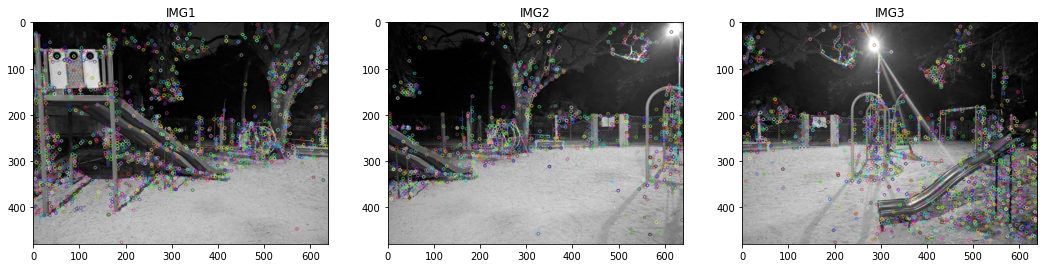

In [166]:


#keypoints

sift_1 = cv2.SIFT_create()
kp_1,des_1 = sift_1.detectAndCompute(img_1,None)




#keypoints
sift_2 = cv2.SIFT_create()
kp_2,des_2 = sift_2.detectAndCompute(img_2,None)




#keypoints
sift_3 = cv2.SIFT_create()
kp_3,des_3 = sift_3.detectAndCompute(img_3,None)


img1=np.zeros((360,640))
img1 = cv2.drawKeypoints(img_1,kp_1,img1)

img2=np.zeros((360,640))
img2 = cv2.drawKeypoints(img_2,kp_2,img2)

img3=np.zeros((360,640))
img3 = cv2.drawKeypoints(img_3,kp_3,img3)

figure, axis = plt.subplots(1, 3)
axis[0].imshow(img1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img3,cmap="gray")
axis[2].set_title('IMG3')

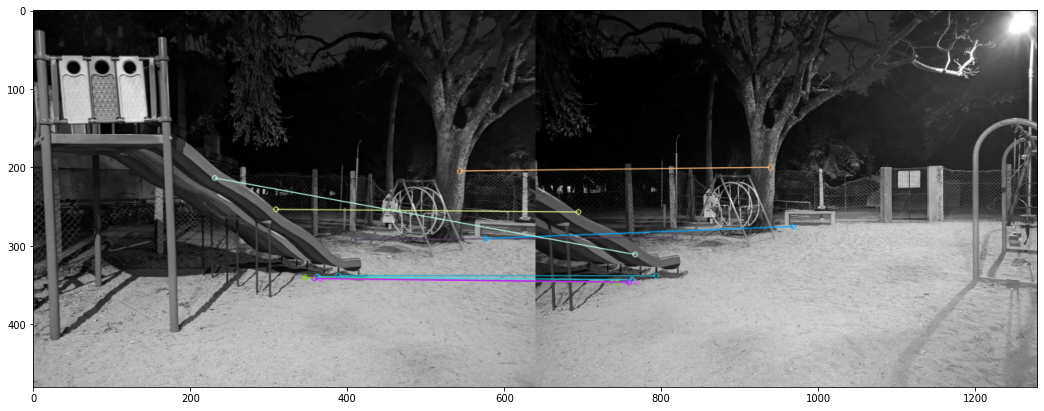

In [167]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# match descriptors of both images
matches = bf.match(des_1,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 10 matches
matched_img = cv2.drawMatches(img_1, kp_1, img_2, kp_2, matches[:10], img_2, flags=2)
plt.imshow(matched_img)

In [177]:
list_kp21 = [(kp_1[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:25]] 
H21=homography(random.sample(list_kp21,4))

In [178]:
len(list_kp21)

25

In [179]:
H21

Matrix([
[     1.30226995690184,   0.777864559969791, 155.327800512679],
[   0.0861243242718081,    2.07258026307981, -176.15561178825],
[-0.000290818264100127, 0.00187759491491139,                1]])

In [180]:
H21,support=ransac(list_kp21,5,0.8,1000,debug=True)

Iteration : 1 Consensus : 0.64
Iteration : 2 Consensus : 0.64
Iteration : 3 Consensus : 0.64
Iteration : 4 Consensus : 0.64
Iteration : 5 Consensus : 0.64
Iteration : 6 Consensus : 0.64
Iteration : 7 Consensus : 0.64
Iteration : 8 Consensus : 0.64
Iteration : 9 Consensus : 0.64
Iteration : 10 Consensus : 0.64
Iteration : 11 Consensus : 0.64
Iteration : 12 Consensus : 0.64
Iteration : 13 Consensus : 0.64
Iteration : 14 Consensus : 0.64
Iteration : 15 Consensus : 0.64
Iteration : 16 Consensus : 0.64
Iteration : 17 Consensus : 0.64
Iteration : 18 Consensus : 0.64
Iteration : 19 Consensus : 0.64
Iteration : 20 Consensus : 0.64
Iteration : 21 Consensus : 0.64
Iteration : 22 Consensus : 0.64
Iteration : 23 Consensus : 0.64
Iteration : 24 Consensus : 0.64
Iteration : 25 Consensus : 0.64
Iteration : 26 Consensus : 0.64
Iteration : 27 Consensus : 0.64
Iteration : 28 Consensus : 0.64
Iteration : 29 Consensus : 0.64
Iteration : 30 Consensus : 0.64
Iteration : 31 Consensus : 0.64
Iteration : 32 Co

Iteration : 261 Consensus : 0.76
Iteration : 262 Consensus : 0.76
Iteration : 263 Consensus : 0.76
Iteration : 264 Consensus : 0.76
Iteration : 265 Consensus : 0.76
Iteration : 266 Consensus : 0.76
Iteration : 267 Consensus : 0.76
Iteration : 268 Consensus : 0.76
Iteration : 269 Consensus : 0.76
Iteration : 270 Consensus : 0.76
Iteration : 271 Consensus : 0.76
Iteration : 272 Consensus : 0.76
Iteration : 273 Consensus : 0.76
Iteration : 274 Consensus : 0.76
Iteration : 275 Consensus : 0.76
Iteration : 276 Consensus : 0.76
Iteration : 277 Consensus : 0.76
Iteration : 278 Consensus : 0.76
Iteration : 279 Consensus : 0.76
Iteration : 280 Consensus : 0.76
Iteration : 281 Consensus : 0.76
Iteration : 282 Consensus : 0.76
Iteration : 283 Consensus : 0.76
Iteration : 284 Consensus : 0.76
Iteration : 285 Consensus : 0.76
Iteration : 286 Consensus : 0.76
Iteration : 287 Consensus : 0.76
Iteration : 288 Consensus : 0.76
Iteration : 289 Consensus : 0.76
Iteration : 290 Consensus : 0.76
Iteration 

Iteration : 519 Consensus : 0.76
Iteration : 520 Consensus : 0.76
Iteration : 521 Consensus : 0.76
Iteration : 522 Consensus : 0.76
Iteration : 523 Consensus : 0.76
Iteration : 524 Consensus : 0.76
Iteration : 525 Consensus : 0.76
Iteration : 526 Consensus : 0.76
Iteration : 527 Consensus : 0.76
Iteration : 528 Consensus : 0.76
Iteration : 529 Consensus : 0.76
Iteration : 530 Consensus : 0.76
Iteration : 531 Consensus : 0.76
Iteration : 532 Consensus : 0.76
Iteration : 533 Consensus : 0.76
Iteration : 534 Consensus : 0.76
Iteration : 535 Consensus : 0.76
Iteration : 536 Consensus : 0.76
Iteration : 537 Consensus : 0.76
Iteration : 538 Consensus : 0.76
Iteration : 539 Consensus : 0.76
Iteration : 540 Consensus : 0.76
Iteration : 541 Consensus : 0.76
Iteration : 542 Consensus : 0.76
Iteration : 543 Consensus : 0.76
Iteration : 544 Consensus : 0.76
Iteration : 545 Consensus : 0.76
Iteration : 546 Consensus : 0.76
Iteration : 547 Consensus : 0.76
Iteration : 548 Consensus : 0.76
Iteration 

Iteration : 786 Consensus : 0.8
Iteration : 787 Consensus : 0.8
Iteration : 788 Consensus : 0.8
Iteration : 789 Consensus : 0.8
Iteration : 790 Consensus : 0.8
Iteration : 791 Consensus : 0.8
Iteration : 792 Consensus : 0.8
Iteration : 793 Consensus : 0.8
Iteration : 794 Consensus : 0.8
Iteration : 795 Consensus : 0.8
Iteration : 796 Consensus : 0.8
Iteration : 797 Consensus : 0.8
Iteration : 798 Consensus : 0.8
Iteration : 799 Consensus : 0.8
Iteration : 800 Consensus : 0.8
Iteration : 801 Consensus : 0.8
Iteration : 802 Consensus : 0.8
Iteration : 803 Consensus : 0.8
Iteration : 804 Consensus : 0.8
Iteration : 805 Consensus : 0.8
Iteration : 806 Consensus : 0.8
Iteration : 807 Consensus : 0.8
Iteration : 808 Consensus : 0.8
Iteration : 809 Consensus : 0.8
Iteration : 810 Consensus : 0.8
Iteration : 811 Consensus : 0.8
Iteration : 812 Consensus : 0.8
Iteration : 813 Consensus : 0.8
Iteration : 814 Consensus : 0.8
Iteration : 815 Consensus : 0.8
Iteration : 816 Consensus : 0.8
Iteratio

In [181]:
support

0.84

In under 1000 iteration we are able to get a conensus of 84% at again $\epsilon = 5$.

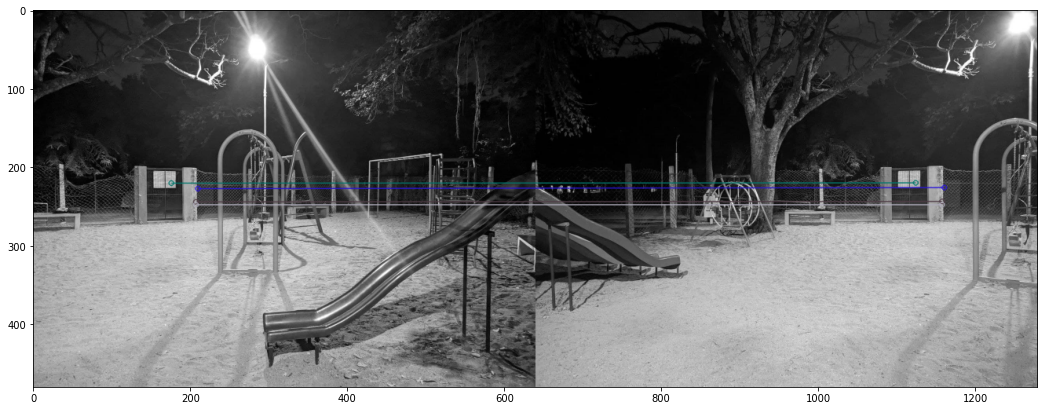

In [182]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# match descriptors of both images
matches = bf.match(des_3,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img_3, kp_3, img_2, kp_2, matches[:4], img_2, flags=2)
plt.imshow(matched_img)

In [193]:
list_kp23 = [(kp_3[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:25]] 
H23=homography(random.sample(list_kp23,4))

In [194]:
H23

Matrix([
[  18.6925076589861,   0.643963818435302, -6663.93479834979],
[  6.53001972613285,     14.706867410859, -3232.29377927769],
[0.0266988312256425, 0.00195890042291704,                 1]])

In [195]:
H23,support=ransac(list_kp23,5,0.8,1000,debug=True)

Iteration : 1 Consensus : 0
Iteration : 2 Consensus : 0
Iteration : 3 Consensus : 0.76
Iteration : 4 Consensus : 0.76


In [196]:
support

0.84

Here again we get a good result in few iteration.

In [203]:
canvas=np.zeros((800,1750))
offset=[350,200]
v=[]
for y_s in range(canvas.shape[0]-1):
    for x_s in range(canvas.shape[1]-1):
        v=[]
        x=x_s-offset[0]
        y=y_s-offset[1]
        
        tmp=np.matmul(H21,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]
        v.append(bilin(tmp[1],tmp[0],img_1))
        
        tmp=np.matmul(H23,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]
        v.append(bilin(tmp[1],tmp[0],img_3))
        
        v.append(bilin(y,x,img_2))

        
        if v.count(0)>2:
            continue
        canvas[y_s][x_s]=sum(v)/(3-v.count(0))
        
                      

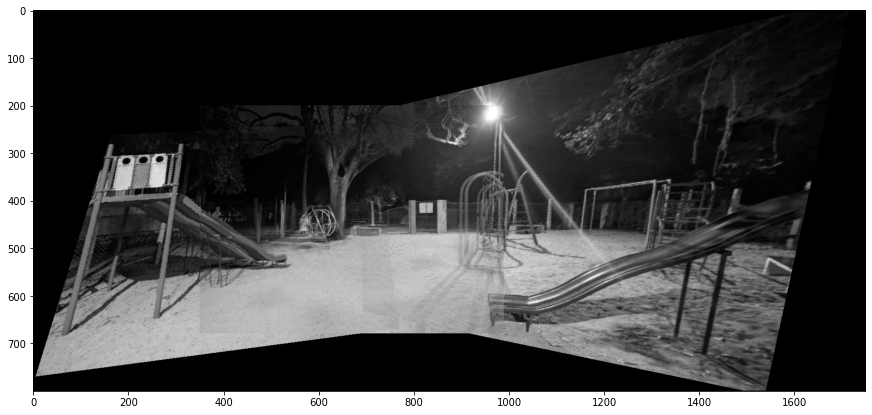

In [204]:
plt.imshow(canvas,cmap="gray")

# Conclusion

* Ransac algorithm written above works well and and i added a few parameter to allow for more flexibility like debug and iteration limit in the function

* Using the Ransac algorithm i was able to get H21 a 0.84 consensus and H23 a conensus of 0.84 as well on my own images. The sift points correspondence was used from opencv library and i used only few of the points it returned as i was not able to get the ransac to converge to get a good enough homography.

* Mosaicing operation has an offset as we are taking reference of img_2 so offset pushes the origin of img_2 to the given offset. During the mosaic operation there were many pixels which gave negative or invalid co-ordinate but it was handled by the bilinear interpolation function and we get a decent mosaic stitch between the 3 images.

* Few observation i had about my own image mosaic.
 - Image_1 seems to be a bit stretched in the bottom left part and similarly we can see some warping in the Image_3 this can be explained by the fact that these images where closer to camera meaning the Z axis had variation across the 3 images meaning we dont get a great homography as we can only compute homography to a scaled factor which comes in form of Z.
 - Image_2 is just shifted by an offset with no warping of any kind as this image is taken as reference which means its multiplied by just Identity matrix.
 - Looking closer we can see a rough line along which these image are overlaid and this seems to be because beyond these lines one of the 3 images have more weightage and in these overlays averaging the pixel intensity creates these artifacts.

* Mosaic gave me a few issues which were mostly about how numpy handles 2-d array.
